7-1 기본

In [ ]:
!mkdir path

In [1]:
#1 객체 디스크에 입력
path = 'C:/Users/dpwl0/OneDrive/바탕화면/Finance/path/'

객체 1개

In [2]:
import numpy as np
from random import gauss

In [3]:
a = [gauss(1.5,2) for i in range(1000000)]

In [4]:
import pickle
pkl_file = open(path+'data.pkl','wb')

In [5]:
%time pickle.dump(a,pkl_file)

Wall time: 93.8 ms


In [6]:
pkl_file

<_io.BufferedWriter name='C:/Users/dpwl0/OneDrive/바탕화면/Finance/path/data.pkl'>

In [7]:
pkl_file.close()

In [8]:
pkl_file = open(path+'data.pkl','rb')

In [9]:
%time b=pickle.load(pkl_file)

Wall time: 140 ms


In [10]:
b[:5]

[-1.0946562995828852,
 -0.5450904437615969,
 0.030069042581096328,
 0.22772656500659316,
 2.801419858776085]

In [11]:
np.allclose(np.array(a),np.array(b)) #두개가 같은지 확인

True

In [12]:
#크기차이있는지
np.sum(np.array(a)-np.array(b))

0.0

객체 2개

In [13]:
pkl_file = open(path+'data.pkl','wb')
%time pickle.dump(np.array(a),pkl_file)

Wall time: 103 ms


In [14]:
%time pickle.dump(np.array(a)**2,pkl_file)

Wall time: 89.3 ms


In [15]:
pkl_file.close()

In [16]:
!dir path*

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 8A0D-3A86

 C:\Users\dpwl0\OneDrive\바탕화면\Finance 디렉터리

2021-03-21  오후 04:41    <DIR>          path
               0개 파일                   0 바이트
               1개 디렉터리  133,623,074,816 바이트 남음


In [17]:
pkl_file = open(path+'data.pkl','rb')

In [18]:
x = pickle.load(pkl_file)
x  #np.array 하나만 반환 다시하면 두번째 개체 나옴

array([-1.0946563 , -0.54509044,  0.03006904, ...,  1.26769649,
        1.32157707,  0.68248607])

In [19]:
y = pickle.load(pkl_file)
y

array([1.19827241e+00, 2.97123592e-01, 9.04147322e-04, ...,
       1.60705438e+00, 1.74656594e+00, 4.65787230e-01])

In [20]:
pkl_file.close()  #어떤 객체가 저장되어있는지 알수 있는 정보 X 따라서 사전객체에 다른객체 담아 해결

In [21]:
pkl_file = open(path+'data.pkl','wb')
pickle.dump({'x':x,'y':y},pkl_file)
pkl_file.close()

pkl_file = open(path+'data.pkl','rb')
data = pickle.load(pkl_file)
pkl_file.close()
for key in data.keys():
    print(key, data[key][:4])

x [-1.0946563  -0.54509044  0.03006904  0.22772657]
y [1.19827241e+00 2.97123592e-01 9.04147322e-04 5.18593884e-02]


텍스트파일 읽고 쓰기

In [22]:
rows = 5000
a = np.random.standard_normal((rows,5)) #가짜자료

In [23]:
a.round(4)

array([[-0.4413, -0.1085,  0.1597, -0.9136, -0.3144],
       [-0.7984, -1.7285, -0.4476,  1.0028,  0.02  ],
       [-0.6612,  2.2284, -1.3023,  0.9755,  0.4031],
       ...,
       [ 0.5192,  0.0122, -0.4535,  0.4542,  1.4493],
       [ 1.0238, -2.0452, -0.4277,  0.0435,  1.9647],
       [ 0.9007, -0.3141,  1.412 ,  0.8366,  1.5995]])

In [24]:
import pandas as pd
t = pd.date_range(start = '2020/1/1',periods=rows,freq='H')
t

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-07-26 22:00:00', '2020-07-26 23:00:00',
               '2020-07-27 00:00:00', '2020-07-27 01:00:00',
               '2020-07-27 02:00:00', '2020-07-27 03:00:00',
               '2020-07-27 04:00:00', '2020-07-27 05:00:00',
               '2020-07-27 06:00:00', '2020-07-27 07:00:00'],
              dtype='datetime64[ns]', length=5000, freq='H')

In [25]:
csv_file = open(path+'data.csv','w')

In [26]:
header = 'date,no1,no2,no3,no4,no5\n'
csv_file.write(header)

25

In [27]:
for t_, (no1,no2,no3,no4,no5) in zip(t,a):
    s='%s,%f,%f,%f,%f,%f\n' % (t_,no1,no2,no3,no4,no5)
    csv_file.write(s)
csv_file.close()

In [28]:
!dir path*

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 8A0D-3A86

 C:\Users\dpwl0\OneDrive\바탕화면\Finance 디렉터리

2021-03-21  오후 04:41    <DIR>          path
               0개 파일                   0 바이트
               1개 디렉터리  133,623,029,760 바이트 남음


In [29]:
csv_file = open(path+'data.csv','r')

In [30]:
for i in range(5):
    print(csv_file.readline(),)

date,no1,no2,no3,no4,no5

2020-01-01 00:00:00,-0.441314,-0.108548,0.159699,-0.913565,-0.314441

2020-01-01 01:00:00,-0.798434,-1.728509,-0.447636,1.002827,0.020040

2020-01-01 02:00:00,-0.661189,2.228376,-1.302304,0.975480,0.403089

2020-01-01 03:00:00,1.124333,0.135413,-0.431345,0.206116,-1.400252



In [31]:
csv_file = open(path+'data.csv','r')
content = csv_file.readlines()
for line in content[:5]:
    print(line,)

date,no1,no2,no3,no4,no5

2020-01-01 00:00:00,-0.441314,-0.108548,0.159699,-0.913565,-0.314441

2020-01-01 01:00:00,-0.798434,-1.728509,-0.447636,1.002827,0.020040

2020-01-01 02:00:00,-0.661189,2.228376,-1.302304,0.975480,0.403089

2020-01-01 03:00:00,1.124333,0.135413,-0.431345,0.206116,-1.400252



In [32]:
csv_file.close()

SQL DataBase

In [33]:
#Default :SQLite3
import sqlite3 as sq3  #문자열객체로 구성

In [34]:
query = 'CREATE TABLE numbs (Date date, No1 real, No2 real)'
con =sq3.connect(path+'numbs.db')

In [35]:
con.execute(query)

OperationalError: table numbs already exists

In [ ]:
con.commit()  #실제로 쿼리문 실행하기 위함

In [36]:
import datetime as dt

In [37]:
con.execute('INSERT INTO numbs VALUES(?,?,?)',
           (dt.datetime.now(),0.12,7.3))   #하나의 자료는 날짜-시간+ 두개의 부동소수점 숫자로 구성

In [38]:
#대량의 자료
data = np.random.standard_normal((10000,2)).round(5)

In [39]:
for row in data:
    con.execute('INSERT INTO numbs VALUES(?,?,?)',
               (dt.datetime.now(),row[0],row[1]))  #execute는 한번에 한 줄씩만 가능하기 때문에 for문 &날짜가 계속 바뀌니까
con.commit()

executemany도 있지만 여기서는 난수에 날짜-시간 정보 조합하기를 원하기 떄문에 사용X. 

In [40]:
con.execute('SELECT * FROM numbs').fetchmany(10)

[('2021-03-11 18:00:58.546204', 0.12, 7.3),
 ('2021-03-11 18:07:43.802537', 2.53518, 0.18684),
 ('2021-03-11 18:07:43.802537', -0.65717, -0.71367),
 ('2021-03-11 18:07:43.802537', -0.50182, 1.16291),
 ('2021-03-11 18:07:43.802537', 2.71558, -1.88037),
 ('2021-03-11 18:07:43.802537', -0.18998, -0.08431),
 ('2021-03-11 18:07:43.802537', 0.23603, 0.88028),
 ('2021-03-11 18:07:43.802537', 2.18266, 1.30665),
 ('2021-03-11 18:07:43.802537', -0.05362, 0.03876),
 ('2021-03-11 18:07:43.802537', -0.30511, 0.08705)]

In [41]:
pointer = con.execute('SELECT * FROM numbs')
for i in range(3):
    print(pointer.fetchone())

('2021-03-11 18:00:58.546204', 0.12, 7.3)
('2021-03-11 18:07:43.802537', 2.53518, 0.18684)
('2021-03-11 18:07:43.802537', -0.65717, -0.71367)


In [42]:
con.close()

Numpy Reading and Wrighting

In [43]:
import numpy as np

In [44]:
dtimes = np.arange('2015-01-01 10:00:00','2021-12-31 22:00:00',
                    dtype='datetime64[m]') #minute intervals
len(dtimes)

3681360

In [45]:
dty = np.dtype([('Date','datetime64[m]'),('No1','f'),('No2','f')])
data = np.zeros(len(dtimes),dtype = dty)

In [46]:
data['Date'] = dtimes  #여기까지가 데이터안에 날짜 넣는거

In [47]:
a = np.random.standard_normal((len(dtimes),2)).round(5)
data['No1'] = a[:,0]
data['No2'] = a[:,1]

In [48]:
%time np.save(path+'array',data) #.npy확장자 붙음

Wall time: 204 ms


In [49]:
%time np.load(path+'array.npy')

Wall time: 88.8 ms


array([('2015-01-01T10:00', -1.72434,  0.25901),
       ('2015-01-01T10:01', -1.49472, -0.55989),
       ('2015-01-01T10:02',  0.25013, -0.85988), ...,
       ('2021-12-31T21:57', -2.94719, -0.18538),
       ('2021-12-31T21:58', -0.78294, -0.75349),
       ('2021-12-31T21:59',  0.64526,  0.79411)],
      dtype=[('Date', '<M8[m]'), ('No1', '<f4'), ('No2', '<f4')])

In [50]:
data = np.random.standard_normal((10000,6000))

In [51]:
%time np.save(path+'array',data)

Wall time: 734 ms


In [52]:
%time np.load(path+'array.npy')

Wall time: 509 ms


array([[-0.32371154, -0.02576429, -1.18895128, ...,  1.14569179,
         0.54106443,  0.47105298],
       [-0.79922356,  0.7680364 ,  2.24229914, ...,  0.26381522,
         0.72790232,  0.23334852],
       [ 1.72318888, -0.13255296,  0.02049113, ...,  0.4857619 ,
        -0.44567254,  1.45149977],
       ...,
       [-0.47069725, -0.32974527,  0.09755919, ..., -0.6769796 ,
        -0.84917024, -0.33872462],
       [-1.11287454,  0.88382302, -0.66519145, ..., -0.16239952,
        -1.58109519,  1.45439719],
       [ 1.02422627,  0.69675561, -1.08930874, ...,  0.50598583,
        -1.45346104, -0.9074628 ]])

In [53]:
data =0.0

SQL DB나 Pickle 보다 numpy가 더빠름 but 이경우 sql DB기능 사용 X 따라서 pytables라이브러리 도움됨

7-2 Pandas이용

In [54]:
import pandas as pd
data = np.random.standard_normal((1000000,5)).round(5) #동일한 데이터세트
filename = path +'numbs'

In [55]:
import sqlite3 as sq3

In [56]:
query = 'CREATE TABLE numbers (No1 real, No2 real,\
        No3 real, No4 real, No5 real)'

In [57]:
con = sq3.Connection(filename + '.db')
con.execute(query)

OperationalError: table numbers already exists

In [58]:
%%time
con.executemany('INSERT INTO numbers VALUES (?,?,?,?,?)',data)
con.commit()

Wall time: 15.8 s


In [59]:
%%time
temp = con.execute('SELECT * FROM numbers').fetchall()
print = temp[:2]
temp = 0.0

Wall time: 18.9 s


In [60]:
%%time
query = 'SELECT * FROM numbers WHERE No1 > 0 and No2 < 0'
res = np.array(con.execute(query).fetchall()).round(3)

Wall time: 8.52 s


(-4.5, 0.5)

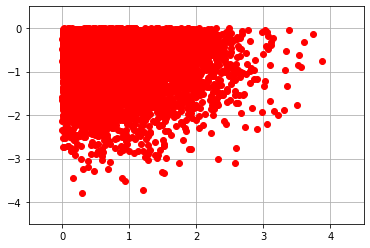

In [61]:
res = res[::100]  #every 100th result
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(res[:,0],res[:,1],'ro')
plt.grid(True); plt.xlim(-0.5,4.5); plt.ylim(-4.5,0.5)

7-2-2

In [62]:
import pandas.io.sql as pds

In [63]:
%time data = pds.read_sql('SELECT * FROM numbers', con)

Wall time: 24.7 s


In [64]:
data.head()

,No1,No2,No3,No4,No5
0,0.03624,-0.04201,-0.93771,-1.68721,-0.07598
1,1.54147,-0.89091,1.63466,0.29125,0.65706
2,-1.24381,-0.43094,0.69098,0.16148,0.31071
3,0.73332,-0.43776,0.10346,-2.76486,0.19452
4,-0.29811,-0.26170,0.60486,-0.20407,-0.43517


In [65]:
%time data[(data['No1'] > 0)&(data['No2'] < 0)].head()

Wall time: 151 ms


,No1,No2,No3,No4,No5
0,0.03624,-0.04201,-0.93771,-1.68721,-0.07598
1,1.54147,-0.89091,1.63466,0.29125,0.65706
3,0.73332,-0.43776,0.10346,-2.76486,0.19452
6,0.23466,-0.22292,-0.07576,-2.13159,0.04215
13,0.90344,-0.30900,-0.28479,0.44690,-1.74442


In [66]:
%%time
res = data[['No1','No2']][((data['No1'] > 0.5) | (data['No1'] < -0.5)) & ((data['No2'] < -1) | (data['No2'] > 1))]

Wall time: 178 ms


(-5.487954, 5.256494, -5.2161685, 5.3972585)

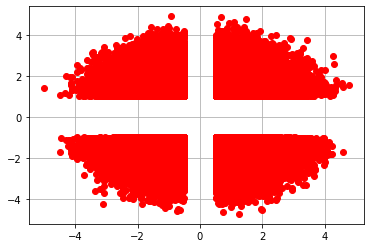

In [67]:
plt.plot(res.No1, res.No2, 'ro'); plt.grid(True); plt.axis('tight')

In [69]:
#pandas가 SQL복제 가능하면 pandas로 하는게 훨 빠름

In [6]:
import sys
sys._enablelegacywindowsfsencoding()

In [69]:
h5s = pd.HDFStore(filename+'.h5s','w')

In [70]:
%time h5s['data'] = data

Wall time: 508 ms


In [71]:
h5s

<class 'pandas.io.pytables.HDFStore'>
File path: C:/Users/dpwl0/OneDrive/바탕화면/Finance/path/numbs.h5s

In [72]:
h5s.close()

In [74]:
%%time
h5s = pd.HDFStore(filename +'.h5s','r')
temp = h5s['data']
h5s.close()

Wall time: 330 ms


In [75]:
np.allclose(np.array(temp),np.array(data)) #같은지 확인

True

In [76]:
temp = 0.0

7-2-3 csv file 저장

In [77]:
%time data.to_csv(filename + '.csv')

Wall time: 22.1 s


Wall time: 2.11 s


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000249CFDCB6D0>,
      dtype=object)

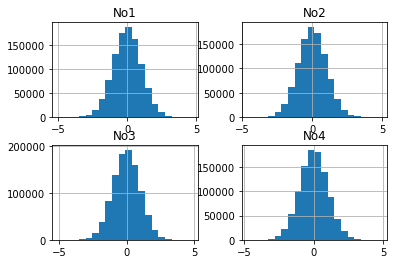

In [78]:
%%time
pd.read_csv(filename + '.csv')[['No1','No2','No3','No4']].hist(bins=20)

7-2-4 excel file save

In [79]:
%time data[:100000].to_excel(filename + '.xlsx',index = False)

Wall time: 27.7 s


Wall time: 20.6 s


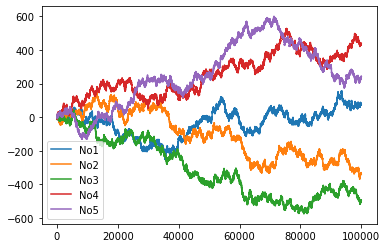

In [80]:
%time pd.read_excel(filename+'.xlsx','Sheet1').cumsum().plot()

# 7-3 fast in-put using PyTables

In [1]:
import numpy as np
import tables as tb
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
filename = path + 'tab.h5'
h5 = tb.open_file(filename,'w')

In [8]:
rows = 2000000

In [9]:
row_des = {
    'Date' : tb.StringCol(26,pos=1),
    'No1' : tb.IntCol(pos=2),
    'No2' : tb.IntCol(pos=3),
    'No3' : tb.Float64Col(pos=4),
    'No4' : tb.Float64Col(pos=5),
    }

In [10]:
filters = tb.Filters(complevel = 0) # No 압축
tab = h5.create_table('/','ints_floats',row_des,
                     title = 'Integers and Floats',
                     expectedrows = rows, filters = filters)

In [11]:
tab

/ints_floats (Table(0,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [12]:
pointer = tab.row

In [13]:
#create sample example 
ran_int = np.random.randint(0,10000,size = (rows,2))
ran_flo = np.random.standard_normal((rows,2)).round(5)

In [14]:
%%time
for i in range(rows):
    pointer['Date'] = dt.datetime.now()
    pointer['No1']= ran_int[i,0]
    pointer['No2']= ran_int[i,1]
    pointer['No3']= ran_flo[i,0]
    pointer['No4']= ran_flo[i,1]
    pointer.append()
    #자료 추가 후 뒤 pointer를 한 행 뒤로 이동
tab.flush()

Wall time: 25.6 s


In [15]:
tab

/ints_floats (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [16]:
dty = np.dtype([('Date','S26'),('No1','<i4'),('No2','<i4'),
               ('No3','<f8'),('No4','<f8')])
sarray = np.zeros(len(ran_int),dtype = dty)

In [17]:
sarray

array([(b'', 0, 0, 0., 0.), (b'', 0, 0, 0., 0.), (b'', 0, 0, 0., 0.), ...,
       (b'', 0, 0, 0., 0.), (b'', 0, 0, 0., 0.), (b'', 0, 0, 0., 0.)],
      dtype=[('Date', 'S26'), ('No1', '<i4'), ('No2', '<i4'), ('No3', '<f8'), ('No4', '<f8')])

In [18]:
%%time
sarray['Date'] = dt.datetime.now()
sarray['No1'] = ran_int[:,0]
sarray['No2'] = ran_int[:,1]
sarray['No3'] = ran_flo[:,0]
sarray['No4'] = ran_flo[:,1]

Wall time: 158 ms


In [19]:
%%time
h5.create_table('/','ints_floats_from_array',sarray,
                     title = 'Integers and Floats',
                     expectedrows = rows, filters = filters)

Wall time: 131 ms


/ints_floats_from_array (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [20]:
h5

File(filename=C:/Users/dpwl0/OneDrive/바탕화면/Finance/path/tab.h5, title='', mode='w', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/ints_floats (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)
/ints_floats_from_array (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [21]:
h5.remove_node('/','ints_floats_from_array')

In [22]:
tab[:3]

array([(b'2021-03-21 18:10:34.555866',  326, 7924, -0.80275,  2.09888),
       (b'2021-03-21 18:10:34.555866', 5565,  619, -0.01353, -0.06922),
       (b'2021-03-21 18:10:34.556863', 5290, 1833, -0.93157, -0.7785 )],
      dtype=[('Date', 'S26'), ('No1', '<i4'), ('No2', '<i4'), ('No3', '<f8'), ('No4', '<f8')])

In [23]:
tab[:4]['No4']

array([ 2.09888, -0.06922, -0.7785 , -1.16953])

In [24]:
%time np.sum(tab[:]['No3'])

Wall time: 185 ms


924.91603

In [25]:
%time np.sum(np.sqrt(tab[:]['No1']))

Wall time: 236 ms


133350289.65959938

2000000
Wall time: 654 ms


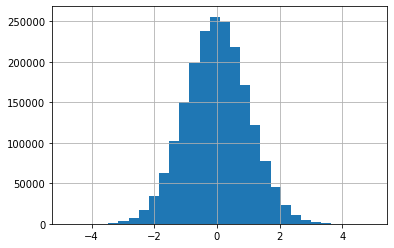

In [26]:
%%time
plt.hist(tab[:]['No3'],bins = 30)
plt.grid(True)
print(len(tab[:]['No3']))

In [27]:
%%time
res = np.array([(row['No3'],row['No4']) for row in tab.where('((No3 < -0.5) | (No3 > 0.5))\
& ((No4<-1)|(No4>1))')])[::100]

Wall time: 962 ms


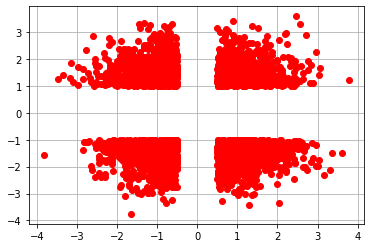

In [28]:
plt.plot(res.T[0],res.T[1],'ro')
plt.grid(True)

In [29]:
values = tab.cols.No3[:]
print("Max %18.3f" % values.max())
print("Ave %18.3f" % values.mean())
print("Min %18.3f" % values.min())
print("Std %18.3f" % values.std())

Max              4.943
Ave              0.000
Min             -4.760
Std              0.999


In [30]:
%%time
results = [(row['No1'],row['No2']) for row in
           tab.where('((No1>9800)|(No1<200))\
           &((No2>4500) | (No2<5500))')]
for res in results[:4]:
    print(res)

(8, 5086)
(9938, 8523)
(9881, 698)
(9973, 752)
Wall time: 217 ms


In [31]:
%%time
results = [(row['No1'],row['No2']) for row in
           tab.where('(No1==1234) & (No2>9776)')]
for res in results:
    print(res)

(1234, 9845)
(1234, 9849)
(1234, 9876)
(1234, 9874)
Wall time: 113 ms


7-3-2 압축테이블 다루기

In [32]:
filename = path + 'tab.h5c'
h5c = tb.open_file(filename,'w')

In [33]:
filters = tb.Filters(complevel = 4, complib = 'blosc')
tabc = h5c.create_table('/','int_floats',sarray,
                       title = 'Integers and Floats',
                       expectedrows = rows, filters =filters)

In [34]:
%%time
res = np.array([(row['No3'],row['No4']) for row in
               tabc.where('((No3 < -0.5) | (No3 > 0.5))\
               &((No4 < -1) | (No4 > 1))')])[::100]

Wall time: 1.01 s


In [35]:
%time arr_non = tab.read()

Wall time: 145 ms


In [36]:
%time arr_com = tabc.read()

Wall time: 173 ms


In [37]:
h5c.close()

7-3-3 배열 다루기

In [38]:
%%time
arr_int = h5.create_array('/','integers',ran_int)
arr_flo = h5.create_array('/','floats',ran_flo)

Wall time: 35.9 ms


In [39]:
h5  #총 3개의 객체가 저장되어있음

File(filename=C:/Users/dpwl0/OneDrive/바탕화면/Finance/path/tab.h5, title='', mode='w', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/floats (Array(2000000, 2)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None
/integers (Array(2000000, 2)) ''
  atom := Int32Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None
/ints_floats (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [40]:
h5.close()

7-3-4 out-of-memory calculrate

In [41]:
filename = path + 'array.h5'
h5 = tb.open_file(filename,'w')

In [45]:
n=1000
ear = h5.create_earray(h5.root,'ear',
                     atom = tb.Float64Atom(),
                     shape=(0,n)) #함수 바뀜 createEArray > create_earray #shape 0쪽이 확장 가능

In [46]:
%%time
rand = np.random.standard_normal((n,n))
for i in range(750):
    ear.append(rand)
ear.flush()

Wall time: 14 s


In [47]:
ear

/ear (EArray(750000, 1000)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (8, 1000)

In [48]:
ear.size_on_disk

6000000000

In [50]:
out = h5.create_earray(h5.root,'out',
                      atom = tb.Float64Atom(),
                      shape = (0,n))

y = 3sin(x)+sqr(abs(x)) 수식 적용 위 EArray 객체 전체에 대해

In [52]:
expr = tb.Expr('3 * sin(ear) + sqrt(abs(ear))')
expr.set_output(out,append_mode = True) #결과 저장 디스크 기반 배열 설정

In [54]:
%time expr.eval()

Wall time: 41.8 s


/out (EArray(750000, 1000)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (8, 1000)

메모리 바깥인 표준 하드웨어에서 실행된 것 치고는 빠른거임

In [55]:
out[0,:10]

array([-1.29011832,  3.04858499,  4.1274909 ,  0.08213763, -0.78639592,
        0.42630448, -1.65851607, -0.92307172, -0.76947409, -1.76491887])

In [56]:
#비교
%time imarray = ear.read()

Wall time: 22.8 s


In [57]:
import numexpr as ne
expr = '3*sin(imarray)+sqrt(abs(imarray))'

In [58]:
ne.set_num_threads(16)
%time ne.evaluate(expr)[0,:10]

Wall time: 24.8 s


array([-1.29011832,  3.04858499,  4.1274909 ,  0.08213763, -0.78639592,
        0.42630448, -1.65851607, -0.92307172, -0.76947409, -1.76491887])

In [59]:
h5.close()